<a href="https://colab.research.google.com/github/cynthianekesa/cynthia_nekesa_rl_summative/blob/main/BotanicalExplorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install stable-baselines3 gymnasium matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
#Creating Custom Gyn Environment called Kalo

import gymnasium as gym
from gymnasium import spaces
import numpy as np

class KaloEnv(gym.Env):
    metadata = {"render_modes": ["human"]}

    def __init__(self):
        super(KaloEnv, self).__init__()

        self.grid_size = 5
        self.state_space = self.grid_size * self.grid_size
        self.obstacles = [(1, 2), (3, 3)]  # Fixed obstacles
        self.target = (4, 4)  # The "cure" location

        # Action space: 0=Up, 1=Down, 2=Left, 3=Right
        self.action_space = spaces.Discrete(4)

        # State space: Agent's (x, y) position
        self.observation_space = spaces.Box(low=0, high=self.grid_size - 1, shape=(2,), dtype=np.int32)

        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        self.agent_pos = (0, 0)  # Start position
        return np.array(self.agent_pos, dtype=np.int32), {}

    def step(self, action):
        x, y = self.agent_pos

        if action == 0 and y > 0:  # Up
            y -= 1
        elif action == 1 and y < self.grid_size - 1:  # Down
            y += 1
        elif action == 2 and x > 0:  # Left
            x -= 1
        elif action == 3 and x < self.grid_size - 1:  # Right
            x += 1

        self.agent_pos = (x, y)

        # Compute reward
        reward = -0.1  # Small step penalty
        done = False

        if self.agent_pos in self.obstacles:
            reward = -1  # Obstacle penalty
        elif self.agent_pos == self.target:
            reward = 10  # Reached the cure!
            done = True

        return np.array(self.agent_pos, dtype=np.int32), reward, done, False, {}

    def render(self):
        grid = np.full((self.grid_size, self.grid_size), ".", dtype=str)

        for ox, oy in self.obstacles:
            grid[oy, ox] = "X"  # Obstacles

        ax, ay = self.agent_pos
        grid[ay, ax] = "A"  # Agent

        tx, ty = self.target
        grid[ty, tx] = "C"  # Cure

        print("\n".join(" ".join(row) for row in grid))
        print()

    def close(self):
        pass

# Example usage
if __name__ == "__main__":
    env = KaloEnv()
    obs, _ = env.reset()
    env.render()

    for _ in range(10):
        action = env.action_space.sample()  # Random action
        obs, reward, done, _, _ = env.step(action)
        env.render()
        if done:
            break


A . . . .
. . . . .
. X . . .
. . . X .
. . . . C

. A . . .
. . . . .
. X . . .
. . . X .
. . . . C

. . A . .
. . . . .
. X . . .
. . . X .
. . . . C

. . . A .
. . . . .
. X . . .
. . . X .
. . . . C

. . . . .
. . . A .
. X . . .
. . . X .
. . . . C

. . . A .
. . . . .
. X . . .
. . . X .
. . . . C

. . A . .
. . . . .
. X . . .
. . . X .
. . . . C

. . . . .
. . A . .
. X . . .
. . . X .
. . . . C

. . A . .
. . . . .
. X . . .
. . . X .
. . . . C

. . A . .
. . . . .
. X . . .
. . . X .
. . . . C

. . . . .
. . A . .
. X . . .
. . . X .
. . . . C



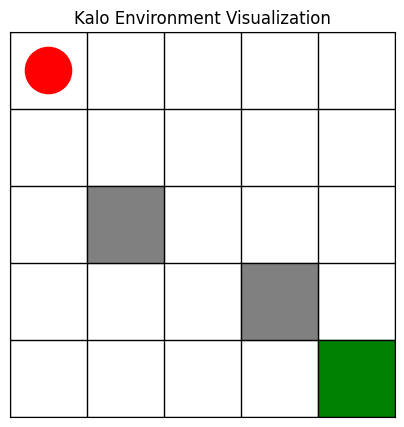

In [ ]:
#Displaying the kalo environment

import numpy as np
import matplotlib.pyplot as plt

# Environment parameters
grid_size = 5
agent_pos = (0, 0)  # Starting position
obstacles = [(1, 2), (3, 3)]  # Obstacles
target = (4, 4)  # Cure location

def visualize_environment(agent_pos):
    fig, ax = plt.subplots(figsize=(5, 5))

    # Draw grid
    for x in range(grid_size + 1):
        ax.plot([x, x], [0, grid_size], 'k', lw=1)
        ax.plot([0, grid_size], [x, x], 'k', lw=1)

    # Plot obstacles
    for (ox, oy) in obstacles:
        ax.add_patch(plt.Rectangle((ox, grid_size - oy - 1), 1, 1, color="gray"))

    # Plot target (Cure)
    tx, ty = target
    ax.add_patch(plt.Rectangle((tx, grid_size - ty - 1), 1, 1, color="green"))

    # Plot agent (Cynthia)
    ax.add_patch(plt.Circle((agent_pos[0] + 0.5, grid_size - agent_pos[1] - 0.5), 0.3, color="red"))

    # Labels and formatting
    ax.set_xticks(np.arange(grid_size) + 0.5, labels=[str(i) for i in range(grid_size)])
    ax.set_yticks(np.arange(grid_size) + 0.5, labels=[str(i) for i in range(grid_size)])
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Kalo Environment Visualization")
    ax.set_aspect('equal')
    plt.show()

# Visualize the initial state
visualize_environment(agent_pos)


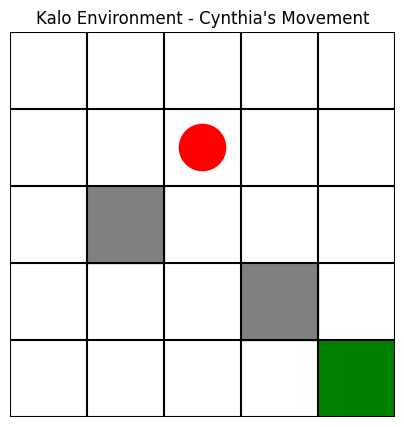

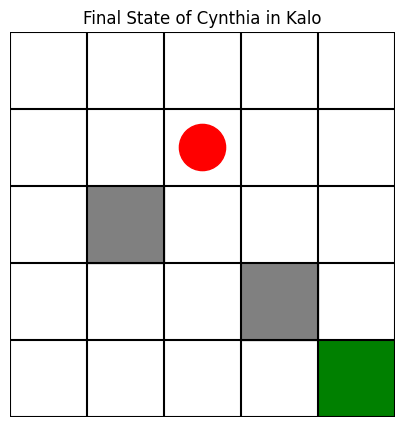

In [ ]:
#Creating a gif to show the agent and its states statically before any training

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Environment setup
grid_size = 5
obstacles = [(1, 2), (3, 3)]
target = (4, 4)
start_pos = (0, 0)

# Helper functions
def get_random_action():
    return np.random.choice([0, 1, 2, 3])  # 0=Up, 1=Down, 2=Left, 3=Right

def update_position(position, action):
    x, y = position
    if action == 0 and y > 0: y -= 1        # Up
    elif action == 1 and y < grid_size - 1: y += 1  # Down
    elif action == 2 and x > 0: x -= 1      # Left
    elif action == 3 and x < grid_size - 1: x += 1  # Right
    return (x, y)

# Simulate Cynthia's path
agent_path = [start_pos]
current_pos = start_pos
while current_pos != target and len(agent_path) < 20:
    action = get_random_action()
    next_pos = update_position(current_pos, action)
    if next_pos not in obstacles:
        current_pos = next_pos
        agent_path.append(current_pos)

# Set up plot
fig, ax = plt.subplots(figsize=(5, 5))

# Animation function
def animate(i):
    ax.clear()

    # Draw grid
    for x in range(grid_size + 1):
        ax.plot([x, x], [0, grid_size], 'k')
        ax.plot([0, grid_size], [x, x], 'k')

    # Draw obstacles
    for (ox, oy) in obstacles:
        ax.add_patch(plt.Rectangle((ox, grid_size - oy - 1), 1, 1, color='gray'))

    # Draw target
    tx, ty = target
    ax.add_patch(plt.Rectangle((tx, grid_size - ty - 1), 1, 1, color='green'))

    # Draw agent
    if i < len(agent_path):
        ax.add_patch(plt.Circle((agent_path[i][0] + 0.5, grid_size - agent_path[i][1] - 0.5), 0.3, color='red'))

    # Settings
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title("Kalo Environment - Cynthia's Movement")

# Animate
ani = animation.FuncAnimation(fig, animate, frames=len(agent_path), interval=500)

# Save as GIF
ani.save("kalo_animation.gif", writer="pillow", fps=2)

# Optional: Display final frame
def visualize_environment(agent_pos):
    fig, ax = plt.subplots(figsize=(5, 5))

    for x in range(grid_size + 1):
        ax.plot([x, x], [0, grid_size], 'k')
        ax.plot([0, grid_size], [x, x], 'k')

    for (ox, oy) in obstacles:
        ax.add_patch(plt.Rectangle((ox, grid_size - oy - 1), 1, 1, color="gray"))

    tx, ty = target
    ax.add_patch(plt.Rectangle((tx, grid_size - ty - 1), 1, 1, color="green"))

    ax.add_patch(plt.Circle((agent_pos[0] + 0.5, grid_size - agent_pos[1] - 0.5), 0.3, color="red"))

    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.axis('off')
    ax.set_aspect('equal')
    ax.set_title("Final State of Cynthia in Kalo")
    plt.show()

# Show last position as a static image
visualize_environment(agent_path[-1])


            Hyperparameter           Value
0            Learning Rate           0.001
1  Gamma (Discount Factor)            0.99
2       Replay Buffer Size           50000
3               Batch Size              32
4     Exploration Strategy  Epsilon-Greedy
Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.51e+03 |
|    ep_rew_mean      | -243     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1516     |
|    time_elapsed     | 0        |
|    total_timesteps  | 10058    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1.31e+03 |
|    ep_rew_mean      | -121     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1226     |
|    time_elapsed     | 0

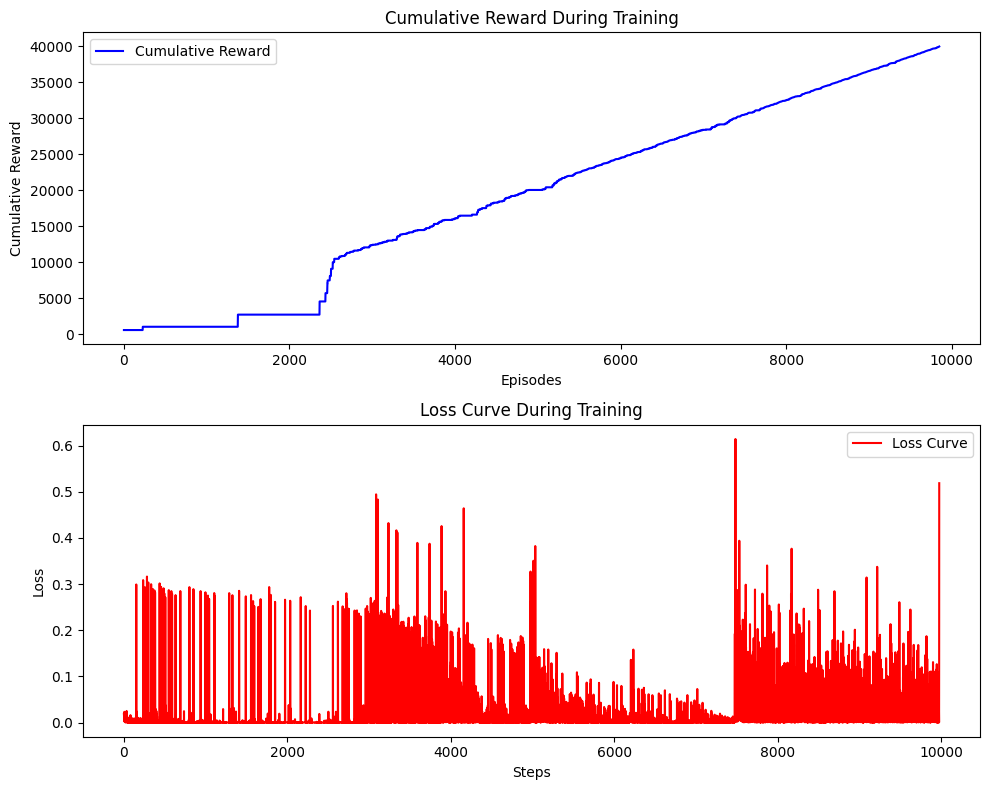

In [60]:
# Training DQN policy, logging monitor csv and drawing graphs to show training performance

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
import os

# Create a directory to save monitor files if it doesn't exist
log_dir = "./gym/"  # directory for logs
os.makedirs(log_dir, exist_ok=True)

# Create Kalo Environment
env = KaloEnv()
# Wrap with Monitor and specify the log directory
env = Monitor(env, filename=log_dir)

#Load results from the specified log directory
#episode_rewards, _ = ts2xy(load_results(log_dir), "timesteps")

# Define DQN Hyperparameters
hyperparams = {
    "Learning Rate": 0.001,
    "Gamma (Discount Factor)": 0.99,
    "Replay Buffer Size": 50000,
    "Batch Size": 32,
    "Exploration Strategy": "Epsilon-Greedy"
}

# Convert to DataFrame and print table
hyperparam_df = pd.DataFrame(hyperparams.items(), columns=["Hyperparameter", "Value"])
print(hyperparam_df)

# Train DQN Agent
model = DQN(
    "MlpPolicy",
    env,
    learning_rate=hyperparams["Learning Rate"],
    gamma=hyperparams["Gamma (Discount Factor)"],
    buffer_size=hyperparams["Replay Buffer Size"],
    batch_size=hyperparams["Batch Size"],
    verbose=1
)

# Train and Log Rewards
timesteps = 10000
reward_log = []
loss_log = []

for i in range(1, timesteps + 1):
    model.learn(total_timesteps=1, reset_num_timesteps=False)

    # Log reward and loss
    episode_rewards, _ = ts2xy(load_results(log_dir), "timesteps")
    if len(episode_rewards) > 0:
        reward_log.append(np.mean(episode_rewards[-10:]))  # Last 10 episodes avg

    # Access the loss through the model's logger
    if model.logger.name_to_value.get("train/loss"):
        loss_log.append(model.logger.name_to_value.get("train/loss"))

# Plot Cumulative Reward and Loss Curves
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Cumulative Reward Plot
ax[0].plot(reward_log, label="Cumulative Reward", color="blue")
ax[0].set_xlabel("Episodes")
ax[0].set_ylabel("Cumulative Reward")
ax[0].set_title("Cumulative Reward During Training")
ax[0].legend()

# Loss Curve Plot
ax[1].plot(loss_log, label="Loss Curve", color="red")
ax[1].set_xlabel("Steps")
ax[1].set_ylabel("Loss")
ax[1].set_title("Loss Curve During Training")
ax[1].legend()

plt.tight_layout()
plt.show()

In [61]:
# Save the trained model
model.save("dqn_kalo_model")
print("Model saved successfully!")

Model saved successfully!


. . . . .
A . . . .
. X . . .
. . . X .
. . . . C

. . . . .
. . . . .
A X . . .
. . . X .
. . . . C

. . . . .
. . . . .
. X . . .
A . . X .
. . . . C

. . . . .
. . . . .
. X . . .
. . . X .
A . . . C

. . . . .
. . . . .
. X . . .
. . . X .
. A . . C

. . . . .
. . . . .
. X . . .
. . . X .
. . A . C

. . . . .
. . . . .
. X . . .
. . . X .
. . . A C

. . . . .
. . . . .
. X . . .
. . . X .
. . . . C

. . . . .
A . . . .
. X . . .
. . . X .
. . . . C

. . . . .
. . . . .
A X . . .
. . . X .
. . . . C

. . . . .
. . . . .
. X . . .
A . . X .
. . . . C

. . . . .
. . . . .
. X . . .
. . . X .
A . . . C

. . . . .
. . . . .
. X . . .
. . . X .
. A . . C

. . . . .
. . . . .
. X . . .
. . . X .
. . A . C

. . . . .
. . . . .
. X . . .
. . . X .
. . . A C

. . . . .
. . . . .
. X . . .
. . . X .
. . . . C

. . . . .
A . . . .
. X . . .
. . . X .
. . . . C

. . . . .
. . . . .
A X . . .
. . . X .
. . . . C

. . . . .
. . . . .
. X . . .
A . . X .
. . . . C

. . . . .
. . . . .
. X . . .
.

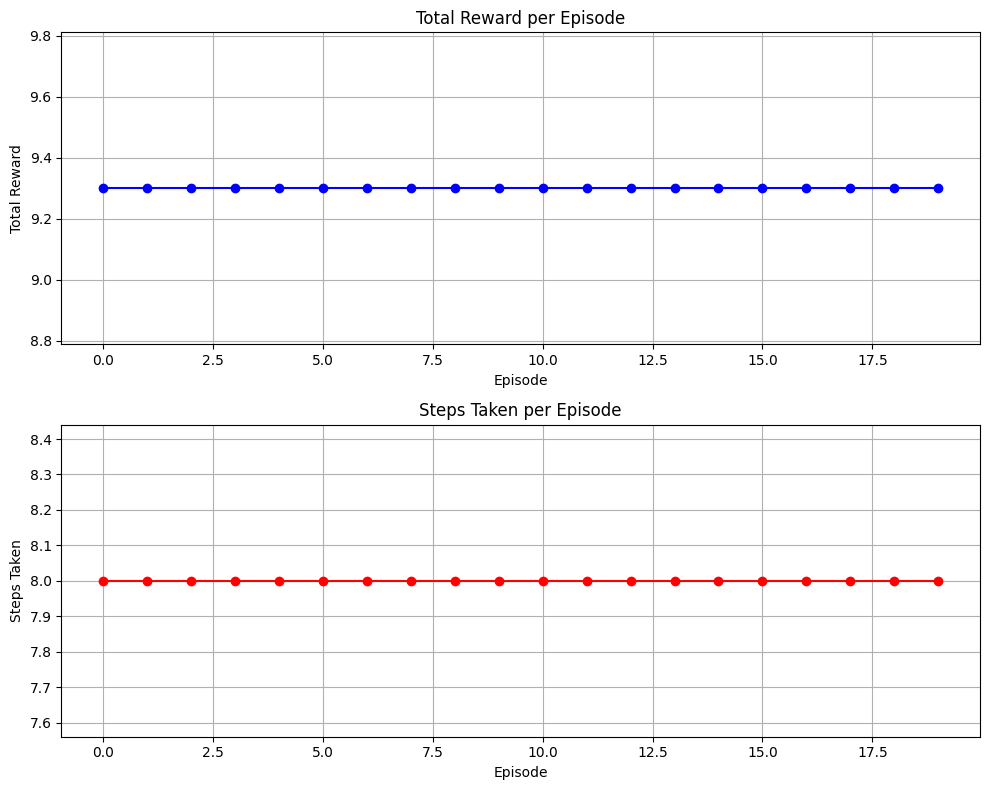

In [62]:
#View trained dqn agent simulation in text based grid for faster rendering and show agent performance

import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN

# Load the trained model
model = DQN.load("dqn_kalo_model")

# Define evaluation parameters
num_episodes = 20  # Number of episodes to evaluate
success_count = 0
total_rewards = []
steps_per_episode = []

# Run simulation
for episode in range(num_episodes):
    obs, _ = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done:
        action, _states = model.predict(obs, deterministic=True)  # Choose best action
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        steps += 1

        # Render the environment
        env.render()

    total_rewards.append(total_reward)
    steps_per_episode.append(steps)

    if reward == 10:  # Success if the agent reached the target
        success_count += 1

# Performance Metrics
avg_reward = np.mean(total_rewards)
avg_steps = np.mean(steps_per_episode)
success_rate = (success_count / num_episodes) * 100

# Print Evaluation Results
print(f"✅ Evaluation Results ({num_episodes} Episodes)")
print(f"🎯 Success Rate: {success_rate:.2f}%")
print(f"🏆 Average Reward: {avg_reward:.2f}")
print(f"🚶‍♂️ Average Steps Taken: {avg_steps:.2f}")

# Plot Performance Metrics
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Reward Per Episode
ax[0].plot(total_rewards, marker='o', linestyle='-', color='blue')
ax[0].set_xlabel("Episode")
ax[0].set_ylabel("Total Reward")
ax[0].set_title("Total Reward per Episode")
ax[0].grid()

# Steps Per Episode
ax[1].plot(steps_per_episode, marker='o', linestyle='-', color='red')
ax[1].set_xlabel("Episode")
ax[1].set_ylabel("Steps Taken")
ax[1].set_title("Steps Taken per Episode")
ax[1].grid()

plt.tight_layout()
plt.show()


✅ Simulation video saved as dqn_trained_agent.mp4


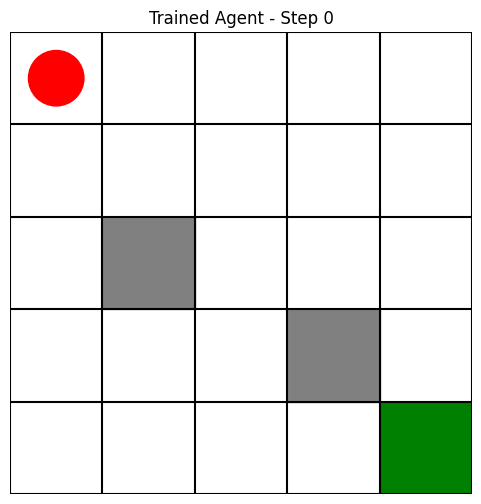

In [63]:
#Save dqn simulation video to show agent's path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from stable_baselines3 import DQN

# Load the trained model
model = DQN.load("dqn_kalo_model")

# Initialize environment
env = KaloEnv()

# Run one episode to collect positions
obs, _ = env.reset()
positions = [obs.copy()]  # Store agent positions
done = False

while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = env.step(action)
    positions.append(obs.copy())

env.close()

# Create animation
fig, ax = plt.subplots(figsize=(6, 6))

def animate(i):
    ax.clear()

    # Draw grid
    for x in range(env.grid_size + 1):
        ax.plot([x, x], [0, env.grid_size], 'k')
        ax.plot([0, env.grid_size], [x, x], 'k')

    # Draw obstacles
    for (ox, oy) in env.obstacles:
        ax.add_patch(plt.Rectangle((ox, env.grid_size - oy - 1), 1, 1, color='gray'))

    # Draw target
    tx, ty = env.target
    ax.add_patch(plt.Rectangle((tx, env.grid_size - ty - 1), 1, 1, color='green'))

    # Draw agent path up to current position
    if i > 0:
        path_x = [p[0] + 0.5 for p in positions[:i+1]]
        path_y = [env.grid_size - p[1] - 0.5 for p in positions[:i+1]]
        ax.plot(path_x, path_y, 'r--', alpha=0.5)

    # Draw current agent position
    ax.add_patch(plt.Circle(
        (positions[i][0] + 0.5, env.grid_size - positions[i][1] - 0.5),
        0.3,
        color='red'
    ))

    # Settings
    ax.set_xlim(0, env.grid_size)
    ax.set_ylim(0, env.grid_size)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"Trained Agent - Step {i}")

# Create animation
ani = animation.FuncAnimation(
    fig,
    animate,
    frames=len(positions),
    interval=500,  # 0.5 second between frames
    repeat=False
)

# Save as MP4
video_path = "dqn_trained_agent.mp4"
ani.save(video_path, writer='ffmpeg', fps=2, dpi=100)

print(f"✅ Simulation video saved as {video_path}")

            Hyperparameter   Value
0            Learning Rate  0.0003
1  Gamma (Discount Factor)  0.9900
2       Clipping Parameter  0.2000
3      Entropy Coefficient  0.0100
Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 92.4     |
|    ep_rew_mean     | -5.49    |
| time/              |          |
|    fps             | 1344     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 57.6     |
|    ep_rew_mean     | 0.535    |
| time/              |          |
|    fps             | 1358     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 4096     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24

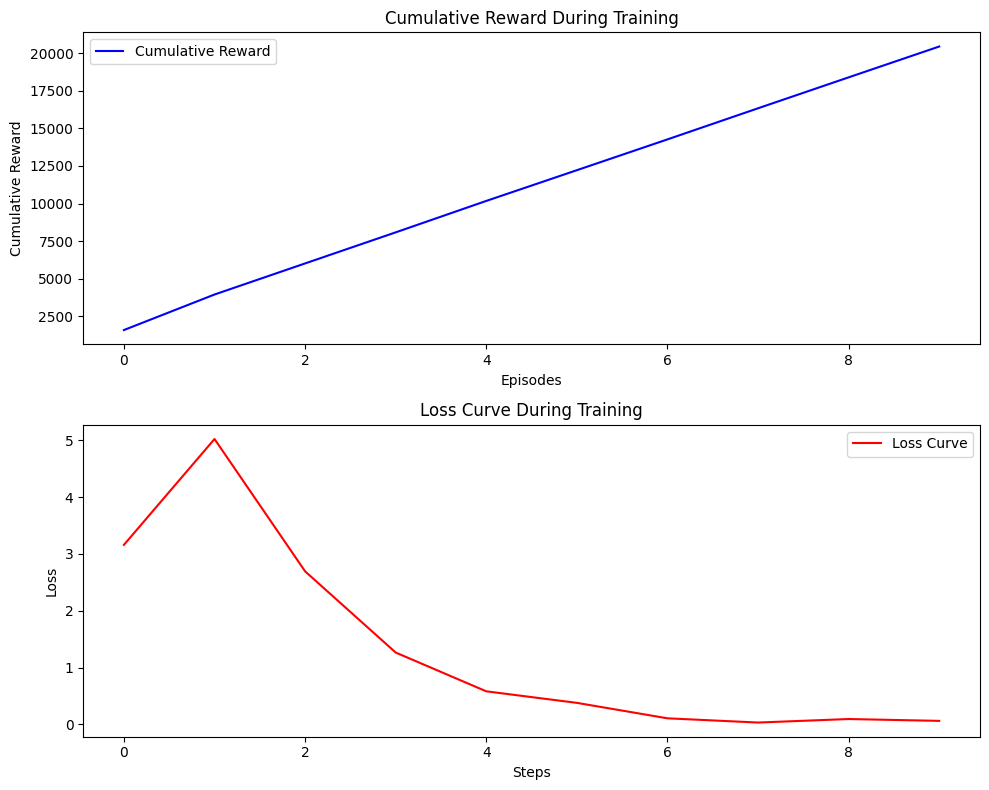

In [ ]:
# Training PPO policy, logging monitor csv and drawing graphs to show training performance

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
import os

# Create a directory to save monitor files if it doesn't exist
log_dir = "./gym/"  # directory for logs
os.makedirs(log_dir, exist_ok=True)

# Create Kalo Environment
env = KaloEnv()
# Wrap with Monitor and specify the log directory
env = Monitor(env, filename=log_dir)

# Define PPO Hyperparameters
hyperparams = {
    "Learning Rate": 0.0003,
    "Gamma (Discount Factor)": 0.99,
    "Clipping Parameter": 0.2,
    "Entropy Coefficient": 0.01
}

# Convert to DataFrame and print table
hyperparam_df = pd.DataFrame(hyperparams.items(), columns=["Hyperparameter", "Value"])
print(hyperparam_df)

# Train PPO Agent
model = PPO(
    "MlpPolicy",
    env,
    learning_rate=hyperparams["Learning Rate"],
    gamma=hyperparams["Gamma (Discount Factor)"],
    clip_range=hyperparams["Clipping Parameter"],
    ent_coef=hyperparams["Entropy Coefficient"],
    verbose=1
)

# Train and Log Rewards
chunk_size = 1000
total_timesteps = 10000
reward_log = []
loss_log = []

for i in range(0, total_timesteps, chunk_size):
    model.learn(total_timesteps=chunk_size, reset_num_timesteps=False)

    # Log reward
    episode_rewards, _ = ts2xy(load_results(log_dir), "timesteps")
    if len(episode_rewards) > 0:
        reward_log.append(np.mean(episode_rewards[-10:]))

    # Access the loss through the model's logger
    if model.logger.name_to_value.get("train/loss"):
        loss_log.append(model.logger.name_to_value.get("train/loss"))

# Plot Cumulative Reward and Loss Curves
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Cumulative Reward Plot
ax[0].plot(reward_log, label="Cumulative Reward", color="blue")
ax[0].set_xlabel("Episodes")
ax[0].set_ylabel("Cumulative Reward")
ax[0].set_title("Cumulative Reward During Training")
ax[0].legend()

# Loss Curve Plot
ax[1].plot(loss_log, label="Loss Curve", color="red")
ax[1].set_xlabel("Steps")
ax[1].set_ylabel("Loss")
ax[1].set_title("Loss Curve During Training")
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
# Save the trained model
model.save("ppo_kalo_model")
print("Model saved successfully!")

Model saved successfully!


. A . . .
. . . . .
. X . . .
. . . X .
. . . . C

. . A . .
. . . . .
. X . . .
. . . X .
. . . . C

. . . A .
. . . . .
. X . . .
. . . X .
. . . . C

. . . . .
. . . A .
. X . . .
. . . X .
. . . . C

. . . . .
. . . . .
. X . A .
. . . X .
. . . . C

. . . . .
. . . . .
. X . . A
. . . X .
. . . . C

. . . . .
. . . . .
. X . . .
. . . X A
. . . . C

. . . . .
. . . . .
. X . . .
. . . X .
. . . . C

. A . . .
. . . . .
. X . . .
. . . X .
. . . . C

. . A . .
. . . . .
. X . . .
. . . X .
. . . . C

. . . A .
. . . . .
. X . . .
. . . X .
. . . . C

. . . . .
. . . A .
. X . . .
. . . X .
. . . . C

. . . . .
. . . . .
. X . A .
. . . X .
. . . . C

. . . . .
. . . . .
. X . . A
. . . X .
. . . . C

. . . . .
. . . . .
. X . . .
. . . X A
. . . . C

. . . . .
. . . . .
. X . . .
. . . X .
. . . . C

. A . . .
. . . . .
. X . . .
. . . X .
. . . . C

. . A . .
. . . . .
. X . . .
. . . X .
. . . . C

. . . A .
. . . . .
. X . . .
. . . X .
. . . . C

. . . . .
. . . A .
. X . . .
.

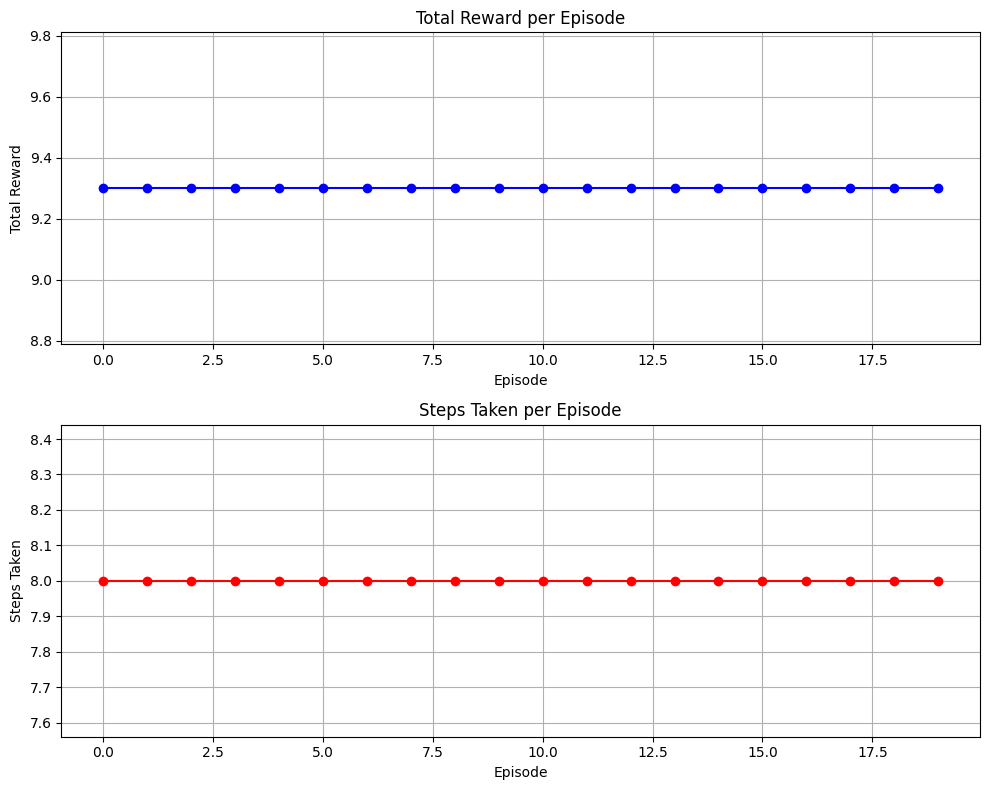

In [ ]:
# Render the trained ppo agent on text based grid for faster output

import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

# Load the trained model
model = PPO.load("ppo_kalo_model")

# Define evaluation parameters
num_episodes = 20  # Number of episodes to evaluate
success_count = 0
total_rewards = []
steps_per_episode = []

# Run simulation
for episode in range(num_episodes):
    obs, _ = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done:
        action, _states = model.predict(obs, deterministic=True)  # Choose best action
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        steps += 1

        # Render the environment in text-based format
        env.render()

    total_rewards.append(total_reward)
    steps_per_episode.append(steps)

    if reward == 10:  # Success if the agent reached the target
        success_count += 1

# Performance Metrics
avg_reward = np.mean(total_rewards)
avg_steps = np.mean(steps_per_episode)
success_rate = (success_count / num_episodes) * 100

# Print Evaluation Results
print(f"✅ Evaluation Results ({num_episodes} Episodes)")
print(f"🎯 Success Rate: {success_rate:.2f}%")
print(f"🏆 Average Reward: {avg_reward:.2f}")
print(f"🚶‍♂️ Average Steps Taken: {avg_steps:.2f}")

# Plot Performance Metrics
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Reward Per Episode
ax[0].plot(total_rewards, marker='o', linestyle='-', color='blue')
ax[0].set_xlabel("Episode")
ax[0].set_ylabel("Total Reward")
ax[0].set_title("Total Reward per Episode")
ax[0].grid()

# Steps Per Episode
ax[1].plot(steps_per_episode, marker='o', linestyle='-', color='red')
ax[1].set_xlabel("Episode")
ax[1].set_ylabel("Steps Taken")
ax[1].set_title("Steps Taken per Episode")
ax[1].grid()

plt.tight_layout()
plt.show()


✅ Simulation video saved as ppo_trained_agent.mp4


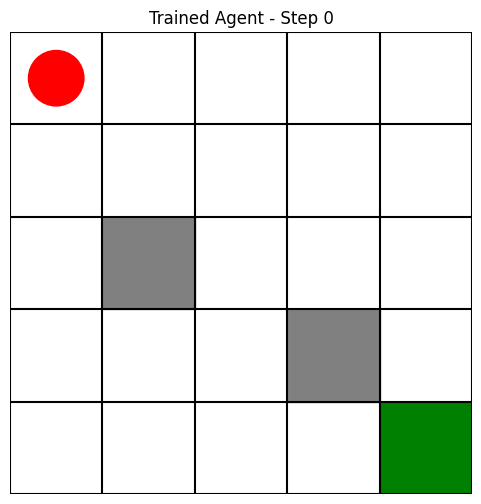

In [25]:
# Video simulation of ppo agent's path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from stable_baselines3 import PPO

# Load the trained model
model = PPO.load("ppo_kalo_model")

# Initialize environment
env = KaloEnv()

# Run one episode to collect positions
obs, _ = env.reset()
positions = [obs.copy()]  # Store agent positions
done = False

while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = env.step(action)
    positions.append(obs.copy())

env.close()

# Create animation
fig, ax = plt.subplots(figsize=(6, 6))

def animate(i):
    ax.clear()

    # Draw grid
    for x in range(env.grid_size + 1):
        ax.plot([x, x], [0, env.grid_size], 'k')
        ax.plot([0, env.grid_size], [x, x], 'k')

    # Draw obstacles
    for (ox, oy) in env.obstacles:
        ax.add_patch(plt.Rectangle((ox, env.grid_size - oy - 1), 1, 1, color='gray'))

    # Draw target
    tx, ty = env.target
    ax.add_patch(plt.Rectangle((tx, env.grid_size - ty - 1), 1, 1, color='green'))

    # Draw agent path up to current position
    if i > 0:
        path_x = [p[0] + 0.5 for p in positions[:i+1]]
        path_y = [env.grid_size - p[1] - 0.5 for p in positions[:i+1]]
        ax.plot(path_x, path_y, 'r--', alpha=0.5)

    # Draw current agent position
    ax.add_patch(plt.Circle(
        (positions[i][0] + 0.5, env.grid_size - positions[i][1] - 0.5),
        0.3,
        color='red'
    ))

    # Settings
    ax.set_xlim(0, env.grid_size)
    ax.set_ylim(0, env.grid_size)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"Trained Agent - Step {i}")

# Create animation
ani = animation.FuncAnimation(
    fig,
    animate,
    frames=len(positions),
    interval=500,  # 0.5 second between frames
    repeat=False
)

# Save as MP4
video_path = "ppo_trained_agent.mp4"
ani.save(video_path, writer='ffmpeg', fps=2, dpi=100)

print(f"✅ Simulation video saved as {video_path}")

✅ Simulation video saved as ppo_agent_10_episodes.mp4


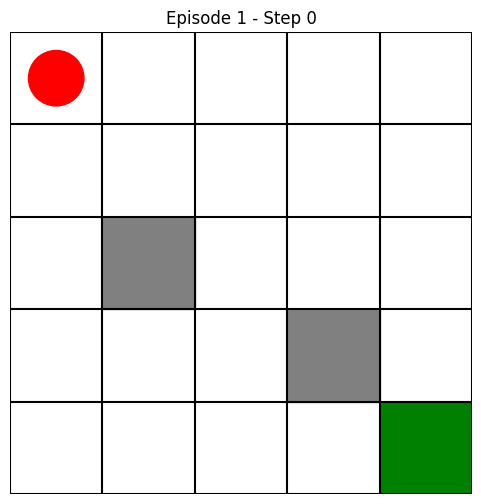

In [26]:
# Increased number of episodes

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from stable_baselines3 import PPO

# Load PPO-trained model
model = PPO.load("ppo_kalo_model")

# Initialize environment
env = KaloEnv()

# Run 10 episodes and store all positions
all_positions = []

for episode in range(10):
    obs, _ = env.reset()
    positions = [obs.copy()]
    done = False

    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, _, _ = env.step(action)
        positions.append(obs.copy())

    all_positions.append(positions)

env.close()

# Create animation
fig, ax = plt.subplots(figsize=(6, 6))

# Flatten positions for frame count
total_frames = sum(len(ep) for ep in all_positions)

# Build a frame index map: (episode_index, step_index)
frame_index = []
for ep_i, ep in enumerate(all_positions):
    for step_i in range(len(ep)):
        frame_index.append((ep_i, step_i))

def animate(i):
    ax.clear()
    ep_i, step_i = frame_index[i]
    positions = all_positions[ep_i]

    # Draw grid
    for x in range(env.grid_size + 1):
        ax.plot([x, x], [0, env.grid_size], 'k')
        ax.plot([0, env.grid_size], [x, x], 'k')

    # Draw obstacles
    for (ox, oy) in env.obstacles:
        ax.add_patch(plt.Rectangle((ox, env.grid_size - oy - 1), 1, 1, color='gray'))

    # Draw target
    tx, ty = env.target
    ax.add_patch(plt.Rectangle((tx, env.grid_size - ty - 1), 1, 1, color='green'))

    # Draw agent path up to current position
    if step_i > 0:
        path_x = [p[0] + 0.5 for p in positions[:step_i+1]]
        path_y = [env.grid_size - p[1] - 0.5 for p in positions[:step_i+1]]
        ax.plot(path_x, path_y, 'r--', alpha=0.5)

    # Draw current agent position
    ax.add_patch(plt.Circle(
        (positions[step_i][0] + 0.5, env.grid_size - positions[step_i][1] - 0.5),
        0.3,
        color='red'
    ))

    # Settings
    ax.set_xlim(0, env.grid_size)
    ax.set_ylim(0, env.grid_size)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"Episode {ep_i + 1} - Step {step_i}")

# Create animation
ani = animation.FuncAnimation(
    fig,
    animate,
    frames=total_frames,
    interval=400,
    repeat=False
)

# Save animation
video_path = "ppo_agent_10_episodes.mp4"
ani.save(video_path, writer='ffmpeg', fps=2, dpi=100)

print(f"✅ Simulation video saved as {video_path}")
